# Scikit-Learn Work-flow
* Get your data ready
* Pick a model that suites your problem
* Fit the model to your data and make a prediction
* Evaluate the model
* Improve through experimentation
* Save and reload your trained model

# 1. Get Your Data Ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#Create X (which represents the feature matrix)
x= heart_disease.drop("target", axis=1)

#Create Y(which represents the label column)
y= heart_disease["target"]

# 2. Picking The Right Model and Hyperparameters

In [4]:
#We want to pick a model suitable for classification
from sklearn.ensemble import RandomForestClassifier #(random forest classifier is a ML model classifier)
clf= RandomForestClassifier()

#We're maintaining the default hperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3. Fit the Model to The Data and Make Predictions

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.2)

In [6]:
clf.fit(x_train, y_train);

In [7]:
# Make a prediction 
y_label=clf.predict(np.array([]))

C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_preds=clf.predict(x_test)
y_preds

In [ ]:
y_test

# 4. Evaluate the model


In [8]:
clf.score(x_train, y_train)

1.0

In [9]:
 clf.score(x_test, y_test)

0.7377049180327869

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))


NameError: name 'y_preds' is not defined

In [13]:
print(confusion_matrix(y_test, y_preds))

NameError: name 'y_preds' is not defined

In [14]:
accuracy_score(y_test, y_preds)

NameError: name 'y_preds' is not defined

# 5. Improve the Model

In [15]:
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print (f"print Model accuracy on test set:{clf.score(x_test, y_test)* 100: .2f} %")
    print(" ")
           

Trying model with 10 estimators...
print Model accuracy on test set: 78.69 %
 
Trying model with 20 estimators...
print Model accuracy on test set: 75.41 %
 
Trying model with 30 estimators...
print Model accuracy on test set: 77.05 %
 
Trying model with 40 estimators...
print Model accuracy on test set: 75.41 %
 
Trying model with 50 estimators...
print Model accuracy on test set: 77.05 %
 
Trying model with 60 estimators...
print Model accuracy on test set: 77.05 %
 
Trying model with 70 estimators...
print Model accuracy on test set: 77.05 %
 
Trying model with 80 estimators...
print Model accuracy on test set: 77.05 %
 
Trying model with 90 estimators...
print Model accuracy on test set: 77.05 %
 


# 6. Save a Model and Load it

In [16]:
#We can save a model using pickle

import pickle
pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [17]:
loaded_model=pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.7704918032786885

# Debugging Warnings in Jupyter

In [18]:
#1. Ignoring warnings using
# import warnings
#warnings.filterwarnings("ignore")

# Detailed Explanation on ML Modeling Workflow
1. Get your Data Ready and this is achieved following three steps:
    * Split your data into features and label usually "X" and "Y"
    * Filling/Inputing or disregarding missing values
    * Convert non-numerical values to numerical values(aka as featuring encoding)
    

In [19]:
 heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
#Split your data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Data Science Quick Tips: clean, transform, reduce:
1. Cleaning Data: this might invole removing outliers, removing colums with missing/incomplete data 
2. Data Transformation: it involves converting or transforming our data to numbers. And it usaully involves 0s and 1s
3. Reduce Your Data: aka column reduction. it saves money :)

# Converting non-numerical data to numbers


In [24]:
car_sales=pd.read_csv("scikit-learn-data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [25]:
#split into x and y
x=car_sales.drop("Price", axis=1)
y= car_sales["Price"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Build ML Model
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()

In [26]:
#To convert the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                              remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [27]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
dummies=pd.get_dummies(car_sales[["Make", "Colour", "Doors"]], dtype=int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [29]:
np.random.seed(42)
x_train, x_test, y_train,y_test= train_test_split(transformed_x,y, test_size=0.2)
model.fit(x_train, y_train)


RandomForestRegressor()

In [30]:
x_train

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.12004e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.56730e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.46824e+05],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.18760e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.86250e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [31]:
y_train

29     13586
535    35683
695    16285
557    22825
836    20938
       ...  
106    13283
270     9379
860     5922
435     8753
102     7404
Name: Price, Length: 800, dtype: int64

# Handling Missing Values with Pandas
* Fill them with some values aka imputation
* Remove the samples with missing data all together

In [32]:
#import car_sales_missing data
car_sales_missing=pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
#Create X and Y
x= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

#OPtion 1: Fill missing Dta with Panda
#fill "Make" column
car_sales_missing["Make"].fillna("missing", inplace= True)
car_sales_missing["Colour"].fillna("missing", inplace= True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)
car_sales_missing["Doors"].fillna(4, inplace= True)


In [35]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [36]:
#Option 2: Remove Rows with Missing Values
car_sales_missing.dropna(inplace= True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [37]:
#To convert the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                              remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

# Option 3: Fill missing values with scikit learn


In [38]:
car_sales_missing=pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [39]:
#drop missing column first
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [40]:
#Split into x and y
x=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

#TO fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with "missing" and numerical values with mean
cat_imputer=SimpleImputer(strategy="constant", fill_value="missing")
door_imputer=SimpleImputer(strategy="constant", fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#Define column
cat_feature=["Make", "Colour"]
door_feature=["Doors"]
num_feature=["Odometer (KM)"]

#Create an imputer i.e something that fills in the missing data
imputer=ColumnTransformer([("cat_imputer", cat_imputer, cat_feature), ("door_imputer", door_imputer, door_feature), ("num_imputer", num_imputer,num_feature)])

#Transform the Data
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [41]:
car_sales_filled=pd.DataFrame(filled_x, columns=["Make", "Colour","Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [42]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [43]:
#To convert the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                              remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [44]:
#Now that we have our missing values filled and converted objects to numbers,LET'S FIT A MODEL
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(transformed_x, y, test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

# Choosing The Right Model/Estimator/Algorithm For Your Data
 * Sklearn refers to models and algorithm as estimators
 * Classification problems leads to predicting a category(heart disease or not)
     * "clf" represents classifier used as a classification estimator
 * Regressor is used for predicting numbers (e.g selling price of a car)
 * When working on a ML problem and you're not sure of the estimator to use, refer to the Sklearn ML map 

# Picking a ML model for a regression problem
* We are going to work with California data set
    * N.B: you can always get sample data to practice with from sklearn dataset

In [45]:
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [46]:
housing_df= pd.DataFrame(housing["data"], columns= housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [47]:
housing_df["Target"]= housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [48]:
housing_df= housing_df.drop("Medhouse Value", axis=1)
housing_df

KeyError: "['Medhouse Value'] not found in axis"

In [ ]:
#Import algorithm
from sklearn.linear_model import Ridge

#set up random seed
np.random.seed(42)

#create your data
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"] #(median house price in $10,000)

#Split the data into tain and test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)


# Instantiate/assign a name to your model and Fit in model on the train set
model = Ridge()  #(Instantiating the model)
model.fit(x_train, y_train)  #(fitting in the model on the training set)


#Check score of model on test set
model.score(x_test, y_test) #(this returns the coefficient of detaermination)

# Ok, let's try a different model aside Ridge to see if our model can be improved. refer back to the sklearn ML map
   * Let's try ensemble Model (a unique feature about this model is its robustness and generalization. it combines other smaller models to make predictions.

In [ ]:
#Let's try ensemble Model, it works with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor 

#Set up random seed
np.random.seed(42)

#create your data
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]

#Split the data to train set and test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Instantiate/assign a name to your model and fit train set
model=RandomForestRegressor()
model.fit(x_train, y_train)

#Score test set
model.score(x_test, y_test)

# Picking Model for Classification Problem

In [ ]:
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease

In [ ]:
#From our sklearn ML map we decide to try out linear SVC model
#Import algorithm

from sklearn.svm import LinearSVC

np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Instantiate linearSVC
clf= LinearSVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)


In [ ]:
#Let's try ensemble classifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

# Summary
* If you have structured data, use ensemble method
* If you have unstructured data, use deep learning or transfer learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

x.head()

In [ ]:
y.head()

# Fitting a Model to a Data to Make Predictions
* x is also known as the features, features variable or data
* y is also known as the target, label, or target variable

# 2 Ways to Make Predictions
1. 'predict()'
2. 'pedict_proba()'

In [ ]:
# Use a trained model to make predictions
clf.predict(x_test)


In [ ]:
np.array(y_test)

In [ ]:
#Let's compare predictions to thr truth labels to evaluate the model
y_preds= clf.predict(x_test)
np.mean(y_preds==y_test)

In [49]:
clf.score(x_test, y_test)

C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 15 features, but RandomForestClassifier is expecting 13 features as input.

In [50]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_preds)

NameError: name 'y_preds' is not defined

# Make predictions with `predict_proba()`
* `predict_proba()` returns probabilities of a classification label

In [51]:
clf.predict_proba(x_test[:5])

ValueError: X has 15 features, but RandomForestClassifier is expecting 13 features as input.

In [52]:
#let's predict() on the same data
clf.predict(x_test[:5])

ValueError: X has 15 features, but RandomForestClassifier is expecting 13 features as input.

In [53]:
#predict() can also be used for regression models
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [54]:
from sklearn.ensemble import RandomForestRegressor 

#Set up random seed
np.random.seed(42)

#create your data
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]

#Split the data to train set and test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Instantiate/assign a name to your model and fit train set
model=RandomForestRegressor()
model.fit(x_train, y_train)

#Score test set
model.score(x_test, y_test)

#Make predictions
y_preds= model.predict(x_test)
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [55]:
np.array([y_test[:10]])

array([[0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]])

In [56]:
# Let's compare the average mean difference between the predictive value and true value
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [57]:
housing_df["Target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

# Evaluating a Machine Learning Model
There are three ways to evaluate scikit learn estimator/models
* Estimator's built-in `score()` method
* The `scoring` parameter
* problem-specific metric function

# Evaluating a model with `score` method

In [58]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_train, y_train)

1.0

In [59]:
clf.score(x_test, y_test)

0.8524590163934426

Let's use `score` method on our regression problem...

In [60]:
from sklearn.ensemble import RandomForestRegressor 

#Set up random seed
np.random.seed(42)

#create your data
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]

#Split the data to train set and test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Instantiate/assign a name to your model and fit train set
model=RandomForestRegressor()
model.fit(x_train, y_train)

#Score test set
model.score(x_test, y_test)

0.8065734772187598

# Evaulating a Model Using `scoring` Parameter

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8524590163934426

In [62]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

# Difference Between Cross Validation and Normal Train-Test-Split
* For normal train_test_split, the data is divided into 2 parts, 80% for taining and 20% for testing
* For cross validation method, by default the model is trained on 5 differnt versions of data and by default tested on 5 differnt versions of data

In [63]:
#Scoring parameter set to none by default
#Default scoring parameter of classifier= mean accuracy
#Cross validation method solves the problem of not trending on all the data set and avoid getting lucky scores.


# Classification Model Evaluation Metrics
* Accuracy
* Area under ROC curve
* Confusion metrics
* Classification report

**Accuracy**

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

#Instantiate RandomForestClassifier
clf= RandomForestClassifier()

cross_val_score=cross_val_score(clf, x, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [83]:
np.mean(cross_val_score)

0.8248087431693989

In [84]:
print(f"Heart disease classifier cross validated accuracy is {np.mean(cross_val_score)*100:.2f} %")

Heart disease classifier cross validated accuracy is 82.48 %


**Area Under Receiver Operating Characteristic (ROC) Curve**
A.K.A
* Area Under Curve(A.U.C)
* ROC curve

**ROC is the comparism of a model's true positive rate (tpr) versus its false positive rate (fpr)
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [85]:
from sklearn.metrics import roc_curve

#split your data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

#fit your model
clf= RandomForestClassifier()
clf.fit(x_train, y_train)

#Make predictions with probabilities
y_probs=clf.predict_proba(x_test)

y_probs

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ],
       [0.13, 0.87],
       [0.29, 0.71],
       [0.04, 0.96],
       [0.53, 0.47],
       [0.15, 0.85],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.34, 0.66],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.05, 0.95],
       [0.14, 0.86],
       [0.01, 0.99],
       [0.19, 0.81],
       [0.95, 0.05],
       [0.64, 0.36],
       [0.15, 0.85],
       [0.84, 0.16],
       [0.29, 0.71],
       [0.51, 0.49],
       [0.8 , 0.2 ],
       [0.85, 0.15],
       [0.76, 0.24],
       [0.4 , 0.6 ],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.15, 0.85],
       [0.23, 0.77],
       [0.81, 0.19],
       [0.  , 1.  ],
       [0.6 , 0.4 ],
       [0.24, 0.76],
       [0.11, 0.89],
       [0.67, 0.33],
       [1.  , 0.  ],
       [0.51, 0.49],
       [0.96, 0.04],
       [0.08,

In [86]:
y_probs_positive=y_probs[:,1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [87]:
#calculate fpr, tpr, thresholds
fpr,tpr, threshold= roc_curve(y_test, y_probs_positive) 

In [88]:
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

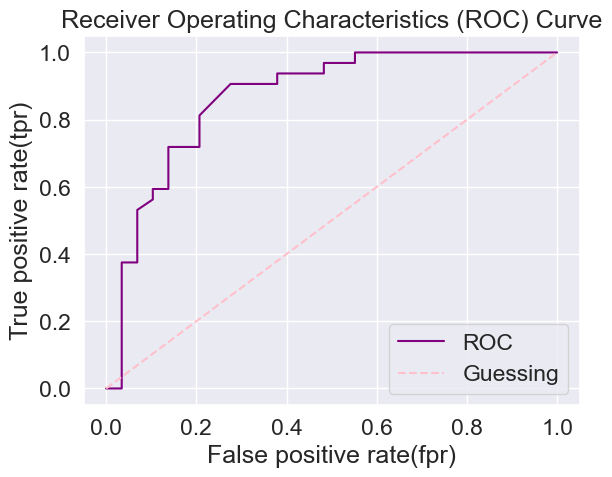

In [89]:
#create a function for plotting ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    plots a ROC curve given the first positive rate(fpr) and true positive rate of a model(tpr).

    """
#plot ROC curve
plt.plot(fpr,tpr, color= "purple", label= "ROC")

#Plot line with no predictive power(baseline)
plt.plot([0,1],[0,1], color= "pink", linestyle="--", label="Guessing")

#Customize the plot
plt.xlabel("False positive rate(fpr)")
plt.ylabel("True positive rate(tpr)")
plt.title("Receiver Operating Characteristics (ROC) Curve")
plt.legend()
plt.show()

plot_roc_curve(fpr,tpr)

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

In [91]:
#Plot perfect ROC curve and AUC score
fpr, tpr, thresholds= roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**
It is a quick way to compare labels a model predicts and the actual label it was meant to predict

In essence it gives you an idea of where the model begins to get confused

In [92]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [93]:
#visualize confusion_matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual label"], colnames= ["Predicted label"])

Predicted label,0,1
Actual label,,
0,23,6
1,6,26


In [94]:
#Let's make our confusion matrix more visual using seaborn's heatmap()

#How to install a package into a current environment from Jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn



Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0




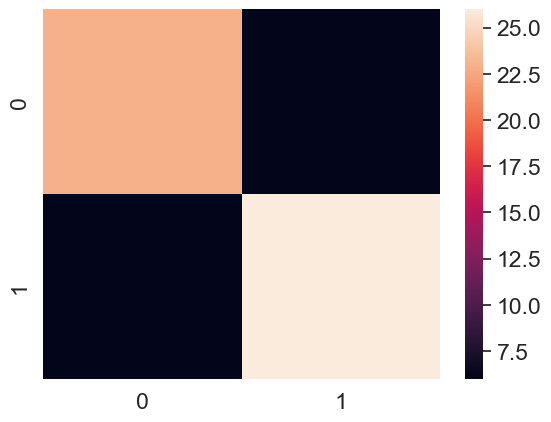

In [95]:
import seaborn as sns

#Set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix

conf_mat=confusion_matrix(y_test, y_preds)

#plot it using seaborn
sns.heatmap(conf_mat);

In [96]:
import sklearn
sklearn.__version__

'1.3.0'

In [97]:
clf 


RandomForestClassifier()

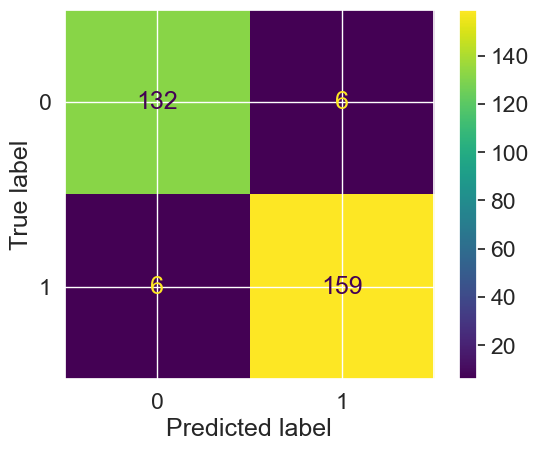

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y);

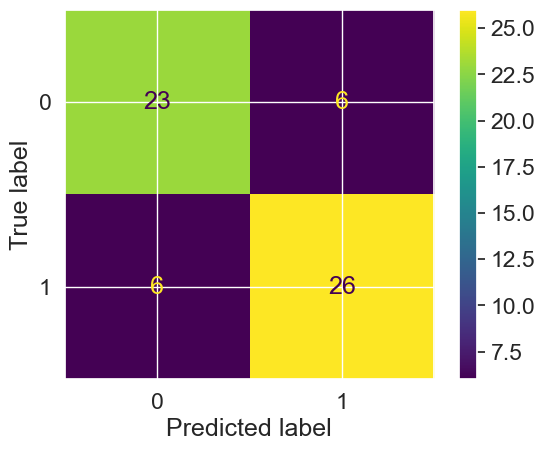

In [99]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

**Classification Report**

In [100]:
 from sklearn.metrics import classification_report 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [101]:
#Wher precision and recall becomes valuable
disease_true=np.zeros(10000)
disease_true[0]=1 #i.e the only positive case 

disease_preds=np.zeros(10000) #i.e our model predicts that no one have heart disease

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


**Regression Model Evaluation Metrics**
We are covering:
* R^2 (Rsquared) coeficcient of determination
* Mean absolute error(MAE)
* Mean squared error (MSE)

In [102]:
from sklearn.ensemble import RandomForestRegressor 

#Set up random seed
np.random.seed(42)

#create your data
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]

#Split the data to train set and test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Instantiate/assign a name to your model and fit train set
model=RandomForestRegressor()
model.fit(x_train, y_train)

#Score test set
model.score(x_test, y_test)

0.8065734772187598

In [103]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [104]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Target, Length: 4128, dtype: float64

In [105]:
y_test.mean()

2.0550030959302323

In [106]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean= np.full(len(y_test), y_test.mean())

In [107]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [108]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [109]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

**Mean Absolute Error**
MAE is the average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong your model predictions are

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
y_preds= model.predict(x_test)

mae=mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [111]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [112]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Target, Length: 4128, dtype: float64

In [113]:
df=pd.DataFrame(data={"actual values":y_test, "predicted values":y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [114]:
df["differences"].mean()

0.012048392126937589

In [115]:
np.abs(df["differences"]).mean()

0.32659871732073664

**Mean Squared Error**
It is the mean of the square of the errors between the actual and predicted values

In [116]:
from sklearn.metrics import mean_squared_error
y_preds=model.predict(x_test)
mse= mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [117]:
df["squared_difference"]=np.square(df["differences"])
df.head(10)

,actual values,predicted values,differences,squared_difference
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
13311,1.58700,1.652530,0.065530,0.004294
7113,1.98200,2.343230,0.361230,0.130487
7668,1.57500,1.661820,0.086820,0.007538
18246,3.40000,2.474890,-0.925110,0.855829
5723,4.46600,4.834478,0.368478,0.135776


**Scoring Prameter**

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

#Instantiate RandomForestClassifier
clf= RandomForestClassifier()

cv_acc=cross_val_score(clf, x, y, cv=5)
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [119]:
#Cross validated accuracy
print(f"The coss validated accuracy is {np.mean(cv_acc)*100:.2f}%")

The coss validated accuracy is 82.48%


In [120]:
np.random.seed
cv_precision=cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [122]:
np.random.seed(49)
cv_recall =cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.87878788, 0.84848485, 0.84848485, 0.87878788])

**Let's see how the `scoring parameter` is being used for regression problems**

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]

#Instantiate RandomForestClassifier
model= RandomForestRegressor()


In [125]:
np.random.seed(42)
cv_r2=cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [126]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [130]:
#MeanAbsoluteError_
cv_mae=cross_val_score(model, x, y, cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

In [131]:
#MeanSquaredError
cv_mse=cross_val_score(model, x, y, cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46483473013771553

In [132]:
cv_mse

array([-0.51825655, -0.33188959, -0.54435805])

In [133]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

**Evaluating Models Using Metric Functions**

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

y_preds=clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [137]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
#create your data
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]

#Split the data to train set and test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#Instantiate/assign a name to your model and fit train set
model=RandomForestRegressor()
model.fit(x_train, y_train)

#Score test set
model.score(x_test, y_test)

y_preds=model.predict(x_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

# Improving a Machine Learning Model

first preictions are aka baseline predictions

**From a Data perspective:**
* could we get more data? (the more the data, the better it is)
* could we improve our data?

**From model perspective:**
* Is there a better model to use?
* can we improve the current model?

**Hyperparameters Vs Parameters**
* Parameters- models find these patterns in data 
* Hyperparameter- settings on a model you can adjust to potentially improve its ability to find patterns

**3 Ways to Adjust Hyperparameters**
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

**Tuning Hyperparameters by hand**
Let's make three sets: taining, validation and test set

In [140]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**We are going to adjust the following hyperparameters
* `max_depth`
* `max_featues`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [173]:
 def evaluate_preds(y_test, y_preds):
        """ 
        performs evaluation comparison on y_true labels vs y_preds labels on a classification model
        
        """
        accuracy=accuracy_score(y_test, y_preds)
        precision= precision_score(y_test, y_preds)
        recall=recall_score(y_test, y_preds)
        f1=f1_score(y_test, y_preds)
        
        metric_dict={"accuracy":round(accuracy,2), "precision":round(precision, 2), "recall":round(recall, 2), "f1":round(f1, 2)}
        
        print(f"Acc:{accuracy*100:.2f}%")
        print(f"precision:{precision:.2f}")
        print(f"Recall:{recall:.2f}")
        print(f"F1 score:{f1:.2f}")
        
        return metric_dict

In [174]:
 heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [175]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#shuffle the data
heart_disease_shuffled=heart_disease.sample(frac=1)

#split into x and y
x= heart_disease_shuffled.drop("target", axis=1)
y= heart_disease_shuffled["target"]

#split data set
train_split=round(0.7* len(heart_disease_shuffled))
valid_split=round(train_split+ 0.15* len(heart_disease_shuffled))

x_train, y_train=x[:train_split], y[:train_split]
test_split=round(0.15* len(heart_disease_shuffled))
x_valid, y_valid= x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test= x[valid_split:], y[:valid_split]



clf=RandomForestClassifier()
clf.fit(x_train, y_train)

#Baseline predictions
y_preds=clf.predict(x_valid)

#evaluate the classifier on prediction set
baseline_metrics=evaluate_preds(y_valid, y_preds)
baseline_metrics


Acc:82.22%
precision:0.81
Recall:0.88
F1 score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [176]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [177]:
#create a 2nd classifier with different hyperparameters
clf_2= RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train )

#make predictions
y_preds_2= clf_2.predict(x_valid)

#evaluate 2nd classifier
clf_2_metrics=evaluate_preds(y_valid, y_preds_2)
 

Acc:84.44%
precision:0.85
Recall:0.88
F1 score:0.86


**Hyperparameter Tuning with RandomizedSearchCV**


In [178]:
from sklearn.model_selection import RandomizedSearchCV


grid={"n_estimators":[10,100,200,500,1000,1200],
     "max_depth": [None,5,10,20,30],
     "max_features":["auto", "sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#split into x and y
x=heart_disease_shuffled.drop("target", axis=1)
y=heart_disease_shuffled["target"]

#split into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

clf=RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10, #number of models to try
                         cv=5,
                         verbose=2)

#fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parame

In [179]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [180]:
#Make predictipns with the best hyperparameter
rs_y_preds=rs_clf.predict(x_test)

#Evaluate the predictions
rs_metrics=evaluate_preds(y_test, rs_y_preds)
 

Acc:81.97%
precision:0.77
Recall:0.86
F1 score:0.81


 **Hyperparameter tuning with GridSearchCV**

In [181]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [182]:
grid_2={'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [184]:
from sklearn.model_selection import GridSearchCV, train_test_split 
np.random.seed(42)

#split into x and y
x=heart_disease_shuffled.drop("target", axis=1)
y=heart_disease_shuffled["target"]

#split into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

clf=RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCV
gs_clf=GridSearchCV(estimator=clf,
                         param_grid=grid_2,
                         cv=5,
                         verbose=2)

#fit the GridSearchCV version of clf
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\Desktop\sample_project\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parame

In [185]:
gs_clf.best_params_


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [186]:
gs_y_preds=gs_clf.predict(x_test)

#evaluate the predictions
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Acc:81.97%
precision:0.77
Recall:0.86
F1 score:0.81


Let's compare our different models metrics

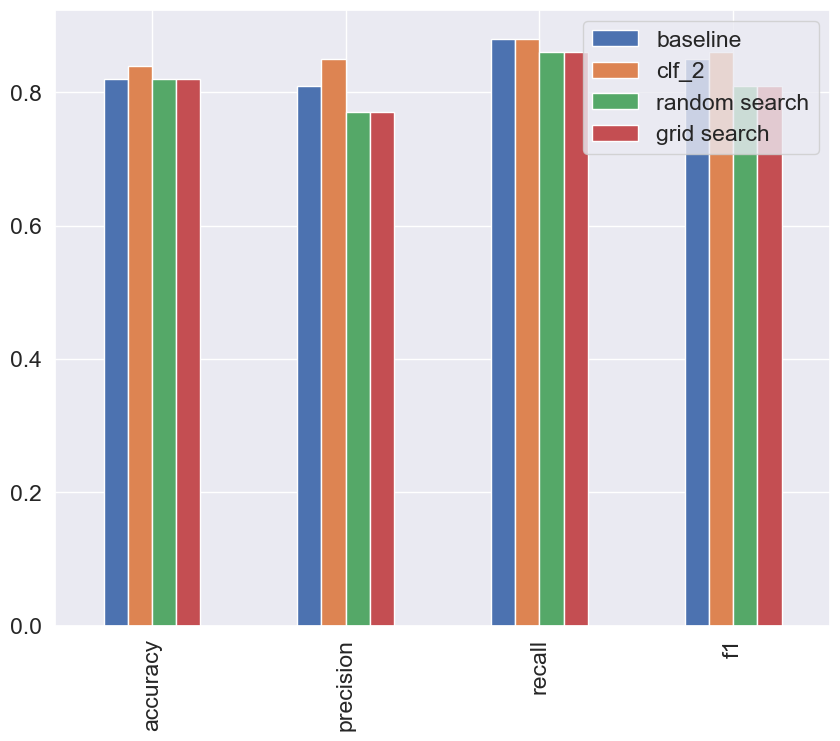

In [187]:
compare_metrics=pd.DataFrame({"baseline": baseline_metrics, "clf_2":clf_2_metrics, "random search":rs_metrics, "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

**How to Save and Load a Trained Model**

There are two methos:
* with python `pickle` module
* with `joblib` module

**Pickle**

In [189]:
import pickle 

#save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pk1", "wb"))

In [191]:
#Load a saved model
loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pk1", "rb"))

In [192]:
#make some predictions to check if it works
pickle_y_preds=loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc:81.97%
precision:0.77
Recall:0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib model**

In [199]:
from joblib import dump,load

#save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")


['gs_random_forest_model_1.joblib']

In [200]:
#To import a saved model
loaded_joblib_model=load(filename="gs_random_forest_model_1.joblib")

In [201]:
#Lets make and evaluate joblib predictions
joblib_y_preds= loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc:81.97%
precision:0.77
Recall:0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Putting it All Together**

In [202]:
data=pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [203]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [205]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
data["Price"]=data["Price"].astype(int)

**steps all in one cell**

1. fill missing data
2. convert data to numbers
3. build a mode

In [53]:
#Get the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#setup numpy seed
import numpy as np
np.random.seed(42)

#import data and drop rows with missing labels
data=pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

#Define differnt features and transformer pipeline
categorical_feature=["Make", "Colour"]
categorical_transformer= Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature=["Doors"]
door_transformer= Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features= ["Odometer (KM)"]
numeric_transformer= Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

#set up preprocessing steps(fill missing values and convert to numbers)
preprocessor=ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features), ("door", door_transformer, door_feature), ("num", numeric_transformer, numeric_features)])

#creating a preprocessing and modelling pipeline
model=Pipeline(steps=[("preprocessor", preprocessor),
                      ("model", RandomForestRegressor())])

#split data
x=data.drop("Price", axis=1)
y=data["Price"]
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size=0.2)

#fit and  score module
model.fit(x_train, y_train)
score=model.score(x_test, y_test)
score

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

It's also possible to use `GridSearchCV` or RandomizedSearchCV with our `Pipeline`

In [54]:
#use GridSearCv with our regression pipeline
pipe_grid= {"preprocessor__num__imputer__strategy": ["mean", "median"], "model__n__estimators":[100,1000],
           "model__max_depth":[None,5],
           "model__max_features":["auto"],
           "model__min_samples_split":[2,4]}

gs_model=GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


ValueError: Invalid parameter 'n' for estimator RandomForestRegressor(max_features='auto'). Valid parameters are: ['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].